In [2]:
import numpy as np
import pandas as pd

# Loading the moodle session data 2016

In [576]:
gl_moodle = pd.read_csv('..\\Datasets\\Moodle\export\\mdl_logstore_standard_log.csv')
gl = gl_moodle
gl_oulad = pd.read_csv('..\\Datasets\\OULAD\\database\\studentVle.csv')


C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [577]:
from datetime import datetime
import time

In [583]:
#import pip

#def install(package):
#    if hasattr(pip, 'main'):
#        pip.main(['install', package])
#    else:
#        pip._internal.main(['install', package])

## Example
#if __name__ == '__main__':
#    install('tzlocal')

In [584]:
def convertTimstamp(timestamp):
    unix_timestamp = float(timestamp)
    #local_timezone = tzlocal.get_localzone() # get pytz timezone
    #local_time = datetime.fromtimestamp(unix_timestamp, local_timezone)
    #local_timezone = tzlocal.get_localzone() # get pytz timezone
    local_time = datetime.fromtimestamp(unix_timestamp)    
    return local_time #print (local_time)
    

In [585]:
def diffTimstamp(timestamp, timestamp2):
    fmt = '%Y-%m-%d %H:%M:%S'
    tstamp1 = datetime.strptime(str(timestamp), fmt)
    print(tstamp1)
    tstamp2 = datetime.strptime(str(timestamp2), fmt)
    print(tstamp2)
    if tstamp1 > tstamp2:
        td = tstamp1 - tstamp2
    else:
        td = tstamp2 - tstamp1
    td_mins = ( round(td.total_seconds() / 3600) - (td.total_seconds() / 3600))*60
    td_hrs = round(td.total_seconds() / 3600)
    td_hrsstay = ( round(td_hrs / 24) - (td_hrs/24))*24
    td_days = int(td_hrs / 24)

    print('The difference is approx. %s days %s hrs %s minutes %s secs' % (td_days,td_hrsstay, td_mins,td.total_seconds()) )

In [586]:
convertTimstamp("1471240452")

datetime.datetime(2016, 8, 15, 6, 54, 12)

In [587]:
convertTimstamp("1471818349")

datetime.datetime(2016, 8, 21, 23, 25, 49)

In [588]:
diffTimstamp(convertTimstamp("1471240452"), convertTimstamp("1471818349"))
#print(diff)

2016-08-15 06:54:12
2016-08-21 23:25:49
The difference is approx. 6 days 7.000000000000007 hrs 28.383333333333667 minutes 577897.0 secs


In [13]:
#gl['target'].unique().tolist()

In [592]:
len(gl['eventname'].unique().tolist())

311

In [593]:
#gl_moodle_user = pd.read_csv('..\Datasets\Moodle\export\mdl_user.csv')

In [594]:
#print (len(gl_moodle_user))
#gl_moodle_user.head()

In [595]:
gl_moodle_course_activities = pd.read_csv('..\Datasets\Moodle\export\mdl_course_modules.csv')

In [11]:
#print (len(gl_moodle_course_activities))
#gl_moodle_course_activities.head()

In [12]:
#gl_moodle_course_activities.name.unique().tolist()

In [10]:
#gl_moodle_course_activities.name.unique().tolist()
#gl_moodle_course_activities

In [599]:
gl_moodle_course_activities_complete = pd.read_csv('..\Datasets\Moodle\export\mdl_course_modules_completion.csv')

In [600]:
#print (len(gl_moodle_course_activities_complete))
#gl_moodle_course_activities_complete.head()

In [601]:
gl_moodle_course_activities_complete_grade = pd.read_csv('..\Datasets\Moodle\export\mdl_grade_grades_history.csv')

In [602]:
#print (len(gl_moodle_course_activities_complete_grade))
#gl_moodle_course_activities_complete_grade.head()

In [603]:
gl_moodle_course_activities_complete_grade.columns

Index(['username', 'id', 'action', 'oldid', 'source', 'timemodified', 'itemid',
       'rawgrade', 'rawgrademax', 'rawgrademin', 'rawscaleid', 'usermodified',
       'finalgrade', 'hidden', 'locked', 'locktime', 'exported', 'overridden',
       'excluded', 'feedback', 'feedbackformat', 'information',
       'informationformat', 'loggedusername'],
      dtype='object')

## Nombre total des traces d'apprentissage

In [604]:
print (len(gl_moodle))

2391762


## August 2016 session

In [605]:
gl = gl_moodle[gl_moodle.courseid==10464]

In [606]:
print (len(gl))

633326


# START PROCESSING DATA HERE

## List of Student

In [607]:
student_list_2016 = gl.username.unique().tolist()
nb_student = len(student_list_2016)
print ("Enrolled Student list",len(student_list_2016))

Enrolled Student list 2168


## List of  activity recorded 

In [608]:
list_event_2016 = gl.eventname.unique().tolist()
print ("list of event recorded",len(list_event_2016))

list of event recorded 168


## Statistics of activity

In [609]:
#gl = gl.set_index('eventname')

## Sélection de quelques traces d'apprentissage d'un apprenant

In [610]:
#gl[gl.eventname==r'\mod_workshop\event\course_module_viewed']
gl[(gl.username=="user1220503334700449793") & (gl.eventname==r'\mod_workshop\event\course_module_viewed')]

,username,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip,relatedusername,realusername
1372967,user1220503334700449793,14822282,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471585035,web,0.0.0.0,NaN,NaN
1415818,user1220503334700449793,14916815,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471776099,web,0.0.0.0,NaN,NaN
1416177,user1220503334700449793,14917486,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471777535,web,0.0.0.0,NaN,NaN
1416496,user1220503334700449793,14918089,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471778629,web,0.0.0.0,NaN,NaN
1416607,user1220503334700449793,14918029,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471778503,web,0.0.0.0,NaN,NaN
1417695,user1220503334700449793,14920457,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471782632,web,0.0.0.0,NaN,user6442803380426375169
1424768,user1220503334700449793,14936557,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1471810397,web,0.0.0.0,NaN,NaN
1626953,user1220503334700449793,15350119,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1472278690,web,0.0.0.0,NaN,NaN
1627425,user1220503334700449793,15350760,\mod_workshop\event\course_module_viewed,mod_workshop,viewed,course_module,workshop,303.0,r,2,...,70,55027,10464,0,N;,1472279967,web,0.0.0.0,NaN,NaN


# Date test

In [611]:
print(convertTimstamp("1471613244"))
print(convertTimstamp("1471714654"))
print(convertTimstamp("1472537382"))

2016-08-19 14:27:24
2016-08-20 18:37:34
2016-08-30 07:09:42


# Dimension de Felder et Silverman dans les données

## Active/Reflective Learning Style Feature Behaviour

In [23]:
LS_1 =r"\core\event\course_viewed,\mod_chat\event\course_module_viewed,\mod_chat\event\message_sent,\mod_chat\event\sessions_viewed,\mod_choice\event\answer_submitted,\mod_choice\event\answer_updated,\mod_choice\event\course_module_viewed,\mod_choicegroup\event\choice_updated,\mod_choicegroup\event\course_module_viewed,\mod_data\event\course_module_viewed,\mod_data\event\record_created,\mod_feedback\event\course_module_viewed,\mod_feedback\event\response_submitted,\mod_folder\event\all_files_downloaded,\mod_folder\event\course_module_viewed,\mod_forum\event\assessable_uploaded,\mod_forum\event\course_module_viewed,\mod_forum\event\course_searched,\mod_forum\event\discussion_created,\mod_forum\event\discussion_subscription_created,\mod_forum\event\discussion_viewed,\mod_forum\event\post_created,\mod_forum\event\post_updated,\mod_lesson\event\content_page_viewed,\mod_lesson\event\lesson_started,\mod_quiz\event\attempt_reviewed,\mod_quiz\event\attempt_started,\mod_quiz\event\attempt_submitted,\mod_quiz\event\attempt_summary_viewed,\mod_quiz\event\attempt_viewed,\mod_quiz\event\course_module_viewed,\mod_survey\event\course_module_viewed"
LS_1+=r"\mod_survey\event\response_submitted,\mod_workshop\event\assessable_uploaded,\mod_workshop\event\assessment_evaluated,\mod_workshop\event\course_module_viewed,\mod_workshop\event\submission_assessed,\mod_workshop\event\submission_created,\mod_workshop\event\submission_reassessed,\mod_workshop\event\submission_viewed"

In [24]:
LS_AR = LS_1.split(",")
LS_AR

['\\core\\event\\course_viewed',
 '\\mod_chat\\event\\course_module_viewed',
 '\\mod_chat\\event\\message_sent',
 '\\mod_chat\\event\\sessions_viewed',
 '\\mod_choice\\event\\answer_submitted',
 '\\mod_choice\\event\\answer_updated',
 '\\mod_choice\\event\\course_module_viewed',
 '\\mod_choicegroup\\event\\choice_updated',
 '\\mod_choicegroup\\event\\course_module_viewed',
 '\\mod_data\\event\\course_module_viewed',
 '\\mod_data\\event\\record_created',
 '\\mod_feedback\\event\\course_module_viewed',
 '\\mod_feedback\\event\\response_submitted',
 '\\mod_folder\\event\\all_files_downloaded',
 '\\mod_folder\\event\\course_module_viewed',
 '\\mod_forum\\event\\assessable_uploaded',
 '\\mod_forum\\event\\course_module_viewed',
 '\\mod_forum\\event\\course_searched',
 '\\mod_forum\\event\\discussion_created',
 '\\mod_forum\\event\\discussion_subscription_created',
 '\\mod_forum\\event\\discussion_viewed',
 '\\mod_forum\\event\\post_created',
 '\\mod_forum\\event\\post_updated',
 '\\mod_less

## Sensing/Intuitive Learning style features behaviour

In [25]:
LS_2 = r"\booktool_print\event\book_printed,\core\event\course_viewed,\mod_book\event\chapter_viewed,\mod_book\event\course_module_viewed,\mod_choice\event\answer_submitted,\mod_choice\event\answer_updated,\mod_choice\event\course_module_viewed,\mod_choicegroup\event\choice_updated,\mod_choicegroup\event\course_module_viewed,\mod_data\event\course_module_viewed,\mod_data\event\record_created,\mod_feedback\event\course_module_viewed,\mod_feedback\event\response_submitted,\mod_folder\event\all_files_downloaded,\mod_folder\event\course_module_viewed,\mod_lesson\event\content_page_viewed,\mod_lesson\event\lesson_started,\mod_quiz\event\attempt_reviewed,\mod_quiz\event\attempt_started,\mod_quiz\event\attempt_submitted,\mod_quiz\event\attempt_summary_viewed,\mod_quiz\event\attempt_viewed,\mod_quiz\event\course_module_viewed,\mod_survey\event\course_module_viewed,\mod_survey\event\response_submitted"

In [26]:
LS_SI = LS_2.split(",")
LS_SI

['\\booktool_print\\event\\book_printed',
 '\\core\\event\\course_viewed',
 '\\mod_book\\event\\chapter_viewed',
 '\\mod_book\\event\\course_module_viewed',
 '\\mod_choice\\event\\answer_submitted',
 '\\mod_choice\\event\\answer_updated',
 '\\mod_choice\\event\\course_module_viewed',
 '\\mod_choicegroup\\event\\choice_updated',
 '\\mod_choicegroup\\event\\course_module_viewed',
 '\\mod_data\\event\\course_module_viewed',
 '\\mod_data\\event\\record_created',
 '\\mod_feedback\\event\\course_module_viewed',
 '\\mod_feedback\\event\\response_submitted',
 '\\mod_folder\\event\\all_files_downloaded',
 '\\mod_folder\\event\\course_module_viewed',
 '\\mod_lesson\\event\\content_page_viewed',
 '\\mod_lesson\\event\\lesson_started',
 '\\mod_quiz\\event\\attempt_reviewed',
 '\\mod_quiz\\event\\attempt_started',
 '\\mod_quiz\\event\\attempt_submitted',
 '\\mod_quiz\\event\\attempt_summary_viewed',
 '\\mod_quiz\\event\\attempt_viewed',
 '\\mod_quiz\\event\\course_module_viewed',
 '\\mod_survey\\ev

## Visual/Verbal

In [27]:
LS_3 = r"\mod_bigbluebuttonbn\event\bigbluebuttonbn_activity_viewed,\mod_forum\event\assessable_uploaded,\mod_forum\event\course_module_viewed,\mod_forum\event\course_searched,\mod_forum\event\discussion_created,\mod_forum\event\discussion_subscription_created,\mod_forum\event\discussion_viewed,\mod_forum\event\post_created,\mod_forum\event\post_updated,\mod_glossary\event\course_module_viewed,\mod_glossary\event\entry_created,\mod_lesson\event\content_page_viewed,\mod_lesson\event\lesson_started,\mod_recordingsbn\event\recordingsbn_resource_page_viewed"

In [28]:
LS_VV = LS_3.split(",")
LS_VV

['\\mod_bigbluebuttonbn\\event\\bigbluebuttonbn_activity_viewed',
 '\\mod_forum\\event\\assessable_uploaded',
 '\\mod_forum\\event\\course_module_viewed',
 '\\mod_forum\\event\\course_searched',
 '\\mod_forum\\event\\discussion_created',
 '\\mod_forum\\event\\discussion_subscription_created',
 '\\mod_forum\\event\\discussion_viewed',
 '\\mod_forum\\event\\post_created',
 '\\mod_forum\\event\\post_updated',
 '\\mod_glossary\\event\\course_module_viewed',
 '\\mod_glossary\\event\\entry_created',
 '\\mod_lesson\\event\\content_page_viewed',
 '\\mod_lesson\\event\\lesson_started',
 '\\mod_recordingsbn\\event\\recordingsbn_resource_page_viewed']

## Sequential/Global

In [29]:
LS_4 =r"\mod_choice\event\answer_submitted,\mod_choice\event\answer_updated,\mod_choice\event\course_module_viewed,\mod_lesson\event\content_page_viewed,\mod_lesson\event\lesson_started,\mod_page\event\course_module_viewed,\mod_wiki\event\course_module_viewed,\mod_wiki\event\page_history_viewed,\mod_wiki\event\page_locks_deleted,\mod_wiki\event\page_map_viewed,\mod_wiki\event\page_updated,\mod_wiki\event\page_viewed"

In [30]:
LS_SG = LS_4.split(",")
LS_SG

['\\mod_choice\\event\\answer_submitted',
 '\\mod_choice\\event\\answer_updated',
 '\\mod_choice\\event\\course_module_viewed',
 '\\mod_lesson\\event\\content_page_viewed',
 '\\mod_lesson\\event\\lesson_started',
 '\\mod_page\\event\\course_module_viewed',
 '\\mod_wiki\\event\\course_module_viewed',
 '\\mod_wiki\\event\\page_history_viewed',
 '\\mod_wiki\\event\\page_locks_deleted',
 '\\mod_wiki\\event\\page_map_viewed',
 '\\mod_wiki\\event\\page_updated',
 '\\mod_wiki\\event\\page_viewed']

In [620]:
gl = gl.sort_index()
gl.head()

,username,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip,relatedusername,realusername
1128,user6913591088091496449,10618099,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,10464,10464,0,N;,1457699491,web,0.0.0.0,NaN,NaN
1129,user5586587012720230401,10696831,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,10464,10464,0,N;,1458011539,web,0.0.0.0,NaN,NaN
1132,user6442803380426375169,10892699,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,10464,10464,0,N;,1458556919,web,0.0.0.0,NaN,NaN
1133,user6442803380426375169,10892699,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,10464,10464,0,N;,1458556919,web,0.0.0.0,NaN,NaN
1134,user2703772880239329281,10902308,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,10464,10464,0,N;,1458578313,web,0.0.0.0,NaN,NaN


###  Group by event name

In [621]:
#gl['percentile'] = gl.groupby(gl.index).rank(pct=True)
gl['percentile'] = gl.groupby(['eventname']).size()
#print (gl['percentile'].drop_duplicates())
gl['percentile'].drop_duplicates().to_csv('list_distribution_event.csv')

# Initiaisation des matrices caractéristique par style d'apprentissage de Felder & Silverman

In [622]:
import numpy as np

In [340]:
m1 = len(LS_AR)
m2 = len(LS_SI)
m3 = len(LS_VV)
m4 = len(LS_SG)
matrix_ls_ActiveReflexive = np.zeros((nb_student,m1),dtype=np.int32)
matrix_ls_SensingIntuitive = np.zeros((nb_student,m2),dtype=np.int32)
matrix_ls_VisualVerbal = np.zeros((nb_student,m3),dtype=np.int32)
matrix_ls_SequentialGlobal = np.zeros((nb_student,m4),dtype=np.int32)

In [341]:
matrix_ls_ActiveReflexive

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Stage 1 :
###  Definition d'une fonction qui retourne la matrice caractéristique des  interactions ou traces d'apprentissage dans le système

In [192]:
def get_features_matrix_learninstyle(gamma,gl,lstyle,ls_student):
    """Take in parameters a list of features , list of id, log mtrix returns the feature matrix of the learning style"""
    #gamma = np.zeros((len(ls_student),len(lstyle)),dtype=np.int8)
    i=0
    for s in ls_student:
        lis=[]
        for lst in lstyle:
            s_gl = gl[(gl.username==s) & (gl.eventname==lst)]#take sub set of event occurence in the log
            lis.append(len(s_gl))
        gamma[i,:] = lis
        i+=1
        if i%10==0:
            print ('processed {}/{}'.format(i,len(ls_student)) )
    return gamma

## Extraction des traces d'apprentissage du fichier log moodle suivant la dimension Active reflective  

In [51]:
get_features_matrix_learninstyle(matrix_ls_ActiveReflexive,gl,LS_AR,student_list_2016)

processed 10/2168
processed 20/2168
processed 30/2168
processed 40/2168
processed 50/2168
processed 60/2168
processed 70/2168
processed 80/2168
processed 90/2168
processed 100/2168
processed 110/2168
processed 120/2168
processed 130/2168
processed 140/2168
processed 150/2168
processed 160/2168
processed 170/2168
processed 180/2168
processed 190/2168
processed 200/2168
processed 210/2168
processed 220/2168
processed 230/2168
processed 240/2168
processed 250/2168
processed 260/2168
processed 270/2168
processed 280/2168
processed 290/2168
processed 300/2168
processed 310/2168
processed 320/2168
processed 330/2168
processed 340/2168
processed 350/2168
processed 360/2168
processed 370/2168
processed 380/2168
processed 390/2168
processed 400/2168
processed 410/2168
processed 420/2168
processed 430/2168
processed 440/2168
processed 450/2168
processed 460/2168
processed 470/2168
processed 480/2168
processed 490/2168
processed 500/2168
processed 510/2168
processed 520/2168
processed 530/2168
pr

array([[   9,    0,    0, ...,    0,    0,    0],
       [-103,    2,    1, ...,    1,    0,   16],
       [ -58,   76,  -72, ...,    0,    0,   12],
       ...,
       [  12,    0,    0, ...,    0,    0,    0],
       [   3,    0,    0, ...,    0,    0,    0],
       [   3,    0,    0, ...,    0,    0,    0]], dtype=int8)

## Extraction des traces d'apprentissage du fichier log moodle suivant la dimension  Sensing Intuitive

In [193]:
get_features_matrix_learninstyle(matrix_ls_SensingIntuitive,gl,LS_SI,student_list_2016)

processed 10/2168
processed 20/2168
processed 30/2168
processed 40/2168
processed 50/2168
processed 60/2168
processed 70/2168
processed 80/2168
processed 90/2168
processed 100/2168
processed 110/2168
processed 120/2168
processed 130/2168
processed 140/2168
processed 150/2168
processed 160/2168
processed 170/2168
processed 180/2168
processed 190/2168
processed 200/2168
processed 210/2168
processed 220/2168
processed 230/2168
processed 240/2168
processed 250/2168
processed 260/2168
processed 270/2168
processed 280/2168
processed 290/2168
processed 300/2168
processed 310/2168
processed 320/2168
processed 330/2168
processed 340/2168
processed 350/2168
processed 360/2168
processed 370/2168
processed 380/2168
processed 390/2168
processed 400/2168
processed 410/2168
processed 420/2168
processed 430/2168
processed 440/2168
processed 450/2168
processed 460/2168
processed 470/2168
processed 480/2168
processed 490/2168
processed 500/2168
processed 510/2168
processed 520/2168
processed 530/2168
pr

array([[   0,    9,    0, ...,    0,    0,    0],
       [   1,  153,  172, ...,    9,    3,    1],
       [   0, 6342,  606, ...,  140,    8,    0],
       ...,
       [   0,   12,    0, ...,    1,    0,    0],
       [   0,    3,    0, ...,    0,    0,    0],
       [   0,    3,    0, ...,    1,    0,    0]])

## Extraction des traces d'apprentissage du fichier log moodle suivant la dimension  Visual Verbal

In [386]:
start = time.time()
get_features_matrix_learninstyle(matrix_ls_VisualVerbal,gl,LS_VV,student_list_2016)
print("processing time {} seconds".format(end - start))

processed 10/2168
processed 20/2168
processed 30/2168
processed 40/2168
processed 50/2168
processed 60/2168
processed 70/2168
processed 80/2168
processed 90/2168
processed 100/2168
processed 110/2168
processed 120/2168
processed 130/2168
processed 140/2168
processed 150/2168
processed 160/2168
processed 170/2168
processed 180/2168
processed 190/2168
processed 200/2168
processed 210/2168
processed 220/2168
processed 230/2168
processed 240/2168
processed 250/2168
processed 260/2168
processed 270/2168
processed 280/2168
processed 290/2168
processed 300/2168
processed 310/2168
processed 320/2168
processed 330/2168
processed 340/2168
processed 350/2168
processed 360/2168
processed 370/2168
processed 380/2168
processed 390/2168
processed 400/2168
processed 410/2168
processed 420/2168
processed 430/2168
processed 440/2168
processed 450/2168
processed 460/2168
processed 470/2168
processed 480/2168
processed 490/2168
processed 500/2168
processed 510/2168
processed 520/2168
processed 530/2168
pr

##  Extraction des traces d'apprentissage du fichier log moodle suivant la dimension Sequential Global

In [380]:
start = time.time()
get_features_matrix_learninstyle(matrix_ls_SequentialGlobal,gl,LS_SG,student_list_2016)
end = time.time()
print("processing time {} seconds".format(end - start))

processed 10/2168
processed 20/2168
processed 30/2168
processed 40/2168
processed 50/2168
processed 60/2168
processed 70/2168
processed 80/2168
processed 90/2168
processed 100/2168
processed 110/2168
processed 120/2168
processed 130/2168
processed 140/2168
processed 150/2168
processed 160/2168
processed 170/2168
processed 180/2168
processed 190/2168
processed 200/2168
processed 210/2168
processed 220/2168
processed 230/2168
processed 240/2168
processed 250/2168
processed 260/2168
processed 270/2168
processed 280/2168
processed 290/2168
processed 300/2168
processed 310/2168
processed 320/2168
processed 330/2168
processed 340/2168
processed 350/2168
processed 360/2168
processed 370/2168
processed 380/2168
processed 390/2168
processed 400/2168
processed 410/2168
processed 420/2168
processed 430/2168
processed 440/2168
processed 450/2168
processed 460/2168
processed 470/2168
processed 480/2168
processed 490/2168
processed 500/2168
processed 510/2168
processed 520/2168
processed 530/2168
pr

## 1.1 Save feature matrix behaviour

## 1.2 Sauvegarde des traces d'apprentissage dans le système de fichiers

In [623]:
#np.save('E:\\ls_ar.npy', matrix_ls_ActiveReflexive)
#np.savetxt('E:\\ls_ar.txt', matrix_ls_ActiveReflexive, fmt='%d')
#np.savetxt('E:\\ls_si.txt', matrix_ls_SensingIntuitive, fmt='%d')
#np.save('E:\\ls_si.npy', matrix_ls_SensingIntuitive)
#np.savetxt('E:\\ls_vv.txt', matrix_ls_VisualVerbal, fmt='%d')
#np.save('E:\\ls_vv.npy', matrix_ls_VisualVerbal)
#np.savetxt('E:\\ls_sg.txt', matrix_ls_SequentialGlobal, fmt='%d')
#np.save('E:\\ls_sg.npy', matrix_ls_SequentialGlobal)

## 1.3 Chargement des traces d'apprentissages

In [7]:
mat = np.loadtxt('data\\features\\txt\\ls_ar.txt',dtype=np.int32)
#mat_abs = np.abs(matrix_ls_ActiveReflexive)
##Negative values because sum up on active reflective was done on int 8 bits so the sum up of values greater than 128 was converted to negative numbr
mat_abs = np.abs(mat)
#print(mat)
mat_si = np.loadtxt('E:\\ls_si.txt',dtype=np.int32)
mat_vv = np.loadtxt('E:\\ls_vv.txt',dtype=np.int32)
mat_sg = np.loadtxt('E:\\ls_sg.txt',dtype=np.int32)

In [8]:
print(mat_abs,"\n-----------------------------\n")
print(mat_si,"\n-----------------------------\n")
print(mat_vv,"\n-----------------------------\n")
print(mat_sg,"\n-----------------------------\n")

[[  9   0   0 ...   0   0   0]
 [103   2   1 ...   1   0  16]
 [ 58  76  72 ...   0   0  12]
 ...
 [ 12   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]] 
-----------------------------

[[   0    9    0 ...    0    0    0]
 [   1  153  172 ...    9    3    1]
 [   0 6342  606 ...  140    8    0]
 ...
 [   0   12    0 ...    1    0    0]
 [   0    3    0 ...    0    0    0]
 [   0    3    0 ...    1    0    0]] 
-----------------------------

[[   0    0    4 ...    0    0    0]
 [  11   26   52 ...    4    2    2]
 [ 130 1416 5820 ...   24    0   66]
 ...
 [   1    0    2 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]] 
-----------------------------

[[  0   0   0 ...   0   0   0]
 [  1   0   4 ...   0   2   2]
 [  0   0  92 ...   4  32 110]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 
-----------------------------



In [5]:
A = np.where(mat_abs==0)
print(A)

(array([   0,    0,    0, ..., 2167, 2167, 2167], dtype=int64), array([ 1,  2,  3, ..., 36, 37, 38], dtype=int64))


In [6]:
#Number of zero of the matrix
np.count_nonzero(mat_abs==0)
print(" percentage of sparse cell LS_AR",np.count_nonzero(mat_abs==0)*100/((mat_abs.shape[0]*mat_abs.shape[1])))
print(" percentage of sparse cell LS_SI",np.count_nonzero(mat_si==0)*100/((mat_si.shape[0]*mat_si.shape[1])))
print(" percentage of sparse cell LS_vv",np.count_nonzero(mat_vv==0)*100/((mat_vv.shape[0]*mat_vv.shape[1])))
print(" percentage of sparse cell LS_SG",np.count_nonzero(mat_sg==0)*100/((mat_sg.shape[0]*mat_sg.shape[1])))

 percentage of sparse cell LS_AR 54.10989686819945
 percentage of sparse cell LS_SI 49.14575645756457
 percentage of sparse cell LS_vv 51.301396942540855
 percentage of sparse cell LS_SG 62.26168511685117


### Remarque* 
Les apprenants n'interagisssent pas sur toutes les **activités et/ou traces d'apprentissage** définit dans le système d'apprentissage moodle. Conséquence mathématiques, les matrices sont très creuses, et nécessitent d'identifier les variables pertinantes et suffisament complètes pour poursuivre l'analyse de leur comportement

## 1.2 Discretisation des traces d'apprentissages

In [7]:
bins = [0,1,2,3] #hint of S. Graf
print("##################################ACTIVE REFLECTIVE#######################################")
digitized = np.digitize(mat_abs, bins)
bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
print(digitized)
print(bin_means)
print("##################################SENSITIVE INTUITIVE#######################################")
digitized_SI = np.digitize(mat_si, bins)
bin_means_si = [mat_si[digitized_SI == i].mean() for i in range(1, len(bins))]
print(digitized_SI)
print(bin_means_si)
print("##################################VISUAL VERBAL#######################################")
digitized_VV = np.digitize(mat_vv, bins)
bin_means_vv = [mat_vv[digitized_VV == i].mean() for i in range(1, len(bins))]
print(digitized_VV)
print(bin_means_vv)
print("##################################SEQUENTIAL GLOBAL#######################################")
digitized_SG = np.digitize(mat_sg, bins)
bin_means_sg = [mat_sg[digitized_SG == i].mean() for i in range(1, len(bins))]
print(digitized_SG)
print(bin_means_sg)

##################################ACTIVE REFLECTIVE#######################################
[[4 1 1 ... 1 1 1]
 [4 3 2 ... 2 1 4]
 [4 4 4 ... 1 1 4]
 ...
 [4 1 1 ... 1 1 1]
 [4 1 1 ... 1 1 1]
 [4 1 1 ... 1 1 1]]
[0.0, 1.0, 2.0]
##################################SENSITIVE INTUITIVE#######################################
[[1 4 1 ... 1 1 1]
 [2 4 4 ... 4 4 2]
 [1 4 4 ... 4 4 1]
 ...
 [1 4 1 ... 2 1 1]
 [1 4 1 ... 1 1 1]
 [1 4 1 ... 2 1 1]]
[0.0, 1.0, 2.0]
##################################VISUAL VERBAL#######################################
[[1 1 4 ... 1 1 1]
 [4 4 4 ... 4 3 3]
 [4 4 4 ... 4 1 4]
 ...
 [2 1 3 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 2 ... 1 1 1]]
[0.0, 1.0, 2.0]
##################################SEQUENTIAL GLOBAL#######################################
[[1 1 1 ... 1 1 1]
 [2 1 4 ... 1 3 3]
 [1 1 4 ... 4 4 4]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[0.0, 1.0, 2.0]


# Stage 2 Compute Learnining Style from discretize learning behaviour

In [42]:
#Define a function here which compute the learning styles and print 
"""We used here a litterature approach to have a prior estimation of the learning style"""
"""S.Graf,2010 & J. Bernard, 2017 """
def build_target(digit_matrix):
    LS = np.sum(digit_matrix,axis=1)/digit_matrix.shape[1]
    max_val =np.max(LS)
    feature_min_student = np.min(mat_abs,axis=1)
    feature_max_student = np.max(mat_abs,axis=1)
    liked_feat_student = np.argmax(mat_abs,axis=1)
    LS_percent =LS*100/max_val
    y_ls_AR_percent = np.vstack(LS_percent)
    y_ls_AR = np.where(y_ls_AR_percent<=50.0,0,1)
    print (LS_percent)
    print('misused E-learning component',feature_min_student)
    print (LS_percent)
    print(y_ls_AR.shape)
    return y_ls_AR, liked_feat_student,LS_percent
    

In [43]:
y_ls_AR, liked_feat_student, LS_percent = build_target(digitized)

[37.5        94.11764706 80.88235294 ... 37.5        33.82352941
 34.55882353]
misused E-learning component [0 0 0 ... 0 0 0]
[37.5        94.11764706 80.88235294 ... 37.5        33.82352941
 34.55882353]
(2168, 1)


In [18]:
############################################Active Relective#############################################################
LS = np.sum(digitized,axis=1)/digitized.shape[1] #compute of learning style
max_val =np.max(LS)
feature_min_student = np.min(mat_abs,axis=1)
feature_max_student = np.max(mat_abs,axis=1)
argmax_feat_student = np.argmax(mat_abs,axis=1)
LS_percent =LS*100/max_val
y_ls_AR_percent = np.vstack(LS_percent)
y_ls_AR = np.where(y_ls_AR_percent<=50.0,0,1)
print (LS_percent)
print(feature_min_student)
print (np.argmax(LS_percent))
print (np.argmin(LS_percent))
print(y_ls_AR)
############################################SENSITIVE INTUITIVE#############################################################
LS_SI_feats = np.sum(digitized_SI,axis=1)/digitized_SI.shape[1] #compute of learning style
max_val =np.max(LS_SI_feats)
feature_min_student_si = np.min(mat_si,axis=1)
feature_max_student_si = np.max(mat_si,axis=1)
argmax_feat_student_si = np.argmax(mat_si,axis=1)
LS_percent_si =LS_SI_feats*100/max_val
y_ls_SI_percent = np.vstack(LS_percent_si)
y_ls_SI = np.where(y_ls_SI_percent<=50.0,0,1)
print (LS_percent_si)
print("feature max si",argmax_feat_student_si)
print (np.argmax(LS_percent_si))
print (np.argmin(LS_percent_si))
print(y_ls_SI)
############################################Visual Verbal#############################################################
LS_VV_feats = np.sum(digitized_VV,axis=1)/digitized_VV.shape[1] #compute of learning style
max_val =np.max(LS_VV_feats)
feature_min_student_vv = np.min(mat_vv,axis=1)
feature_max_student_vv = np.max(mat_vv,axis=1)
argmax_feat_student_vv = np.argmax(mat_vv,axis=1)
LS_percent_vv =LS_VV_feats*100/max_val
y_ls_VV_percent = np.vstack(LS_percent_vv)
y_ls_VV = np.where(y_ls_VV_percent<=50.0,0,1)
print (LS_percent_vv)
print("feature max vv",argmax_feat_student_vv)
print (np.argmax(LS_percent_vv))
print (np.argmin(LS_percent_vv))
print(y_ls_VV)
############################################Sequential Global#############################################################
LS_SG_feats = np.sum(digitized_SG,axis=1)/digitized_SG.shape[1] #compute of learning style
max_val =np.max(LS_SG_feats)
feature_min_student_sg = np.min(mat_sg,axis=1)
feature_max_student_sg = np.max(mat_sg,axis=1)
argmax_feat_student_sg = np.argmax(mat_sg,axis=1)
LS_percent_sg =LS_SG_feats*100/max_val
y_ls_SG_percent = np.vstack(LS_percent_sg)
y_ls_SG = np.where(y_ls_SG_percent<=50.0,0,1)
print (LS_percent_si)
print("feature max sg",argmax_feat_student_sg)
print (np.argmax(LS_percent_sg))
print (np.argmin(LS_percent_sg))
print(y_ls_SG)


[37.5        94.11764706 80.88235294 ... 37.5        33.82352941
 34.55882353]
[0 0 0 ... 0 0 0]
377
752
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[34.83146067 96.62921348 74.15730337 ... 39.3258427  35.95505618
 35.95505618]
feature max si [1 2 1 ... 1 1 1]
556
438
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[37.03703704 88.88888889 92.59259259 ... 31.48148148 25.92592593
 27.77777778]
feature max vv [2 6 6 ... 2 0 2]
49
440
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[34.83146067 96.62921348 74.15730337 ... 39.3258427  35.95505618
 35.95505618]
feature max sg [5 5 5 ... 5 0 0]
49
419
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [37]:
#Define a function to print relevant features.
def extract_unique_descriptor(argmax_feat_student):
    indDesc = []
    l_behav = []
    for elt in argmax_feat_student:
        if not elt in indDesc:
            indDesc.append(elt)
            l_behav.append(LS_AR[elt]) 
    Desc = np.vstack(l_behav)
    return indDesc,Desc

In [40]:
indDesc,Desc = extract_unique_descriptor(liked_feat_student)

In [632]:
#LS_AR[feature_max_student[2169]]
liste = []
l_behav = []
for elt in argmax_feat_student:
    if not elt in liste:
        liste.append(elt)
        l_behav.append(LS_AR[elt]) 
print(liste)
print (np.vstack(l_behav))

liste_si = []
l_behav_si = []
for elt in argmax_feat_student_si:
    if not elt in liste_si:
        liste_si.append(elt)
        l_behav_si.append(LS_SI[elt]) 
print(liste_si)
print (np.vstack(l_behav_si))

liste_vv = []
l_behav_vv = []
for elt in argmax_feat_student_vv:
    if not elt in liste_vv:
        liste_vv.append(elt)
        l_behav_vv.append(LS_VV[elt]) 
print(liste_vv)
print (np.vstack(l_behav_vv))

liste_sg = []
l_behav_sg = []
for elt in argmax_feat_student_sg:
    if not elt in liste_sg:
        liste_sg.append(elt)
        l_behav_sg.append(LS_SG[elt]) 
print(liste_sg)
print (np.vstack(l_behav_sg))

[0, 14, 20, 16, 19, 38, 15, 34, 9, 8, 3]
[['\\core\\event\\course_viewed']
 ['\\mod_folder\\event\\course_module_viewed']
 ['\\mod_forum\\event\\discussion_viewed']
 ['\\mod_forum\\event\\course_module_viewed']
 ['\\mod_forum\\event\\discussion_subscription_created']
 ['\\mod_workshop\\event\\submission_viewed']
 ['\\mod_forum\\event\\assessable_uploaded']
 ['\\mod_workshop\\event\\course_module_viewed']
 ['\\mod_data\\event\\course_module_viewed']
 ['\\mod_choicegroup\\event\\course_module_viewed']
 ['\\mod_chat\\event\\sessions_viewed']]
[1, 2, 8, 9]
[['\\core\\event\\course_viewed']
 ['\\mod_book\\event\\chapter_viewed']
 ['\\mod_choicegroup\\event\\course_module_viewed']
 ['\\mod_data\\event\\course_module_viewed']]
[2, 6, 9, 5, 0, 3, 1, 13, 11]
[['\\mod_forum\\event\\course_module_viewed']
 ['\\mod_forum\\event\\discussion_viewed']
 ['\\mod_glossary\\event\\course_module_viewed']
 ['\\mod_forum\\event\\discussion_subscription_created']
 ['\\mod_bigbluebuttonbn\\event\\bigbluebutto

(array([2., 0., 2., 2., 1., 2., 0., 0., 1., 1.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <a list of 10 Patch objects>)

C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


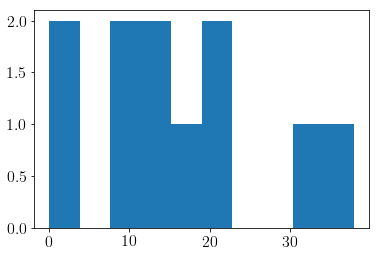

In [633]:
vc = np.vstack(liste)
vc.shape
plt.hist(vc)

In [634]:
import time
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})
gamma2= np.array([])#zeros((1,m1),dtype=np.int8)
S = [] 

In [635]:
def get_features_matrix_learninstyle2(gl,lstyle,s):
    """Take in parameters a list of features , list of id, log mtrix returns the feature matrix of the learning style"""
    #gamma = np.zeros((len(ls_student),len(lstyle)),dtype=np.int8)
    
    if not s in S:
        lis = []
        for lst in lstyle:
            s_gl = gl[(gl.username==s) & (gl.eventname==lst)]#take sub set of event occurence in the log
            lis.append(len(s_gl))
        v = np.asarray(lis)
        gamma2  = np.vstack((gamma2,v))
        #gamma.append(lis)
        S.append(s)

In [636]:
start =time.time()
#sd = gl.apply(lambda s: get_features_matrix_learninstyle2(gl,LS_AR,s))
end = time.time()
print ('Matrix generation processing time  {}'.format(end -start))

Matrix generation processing time  0.0


## Explore low feature behaviour regarding learning style detectected

### Low feature hint

C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


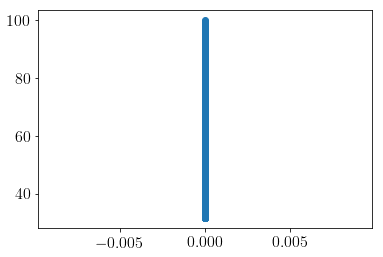

In [637]:
plt.scatter(feature_min_student, LS_percent)

## Explore high feature behaviour regarding learning style detectected

In [ ]:
#Define a function to plot all the

### high feature hint Active Reflective

In [41]:
print(indDesc)

[0, 14, 20, 16, 19, 38, 15, 34, 9, 8, 3]


\core\event\course_viewed


C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


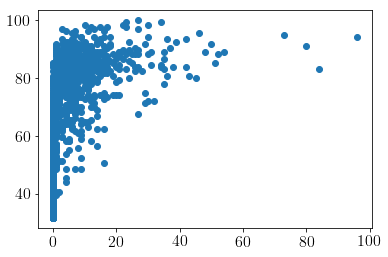

In [639]:
#plt.scatter(feature_max_student, y_ls_AR)
print(LS_AR[0])
relevant_feature = [0, 14, 20, 16, 19, 38, 15, 34, 9, 8, 3]
plt.scatter(mat_abs[:,38], LS_percent)
plt.savefig("feature_ar_0.png")

### high feature hint Sensitive Intuitive

In [640]:
print(liste_si)

[1, 2, 8, 9]


C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


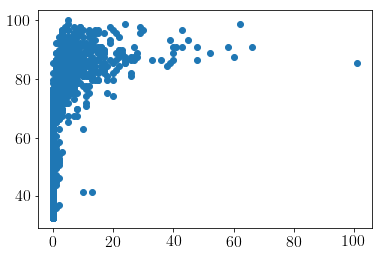

In [641]:
relevant_feature_si = liste_si
plt.scatter(mat_si[:,9], LS_percent_si)
plt.savefig("E:\\feature_si_20.png")

In [642]:
liste_si = [2,9]#out 1, 8

### high feature hint Visual Verbal

In [643]:
print(liste_vv)

[2, 6, 9, 5, 0, 3, 1, 13, 11]


C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


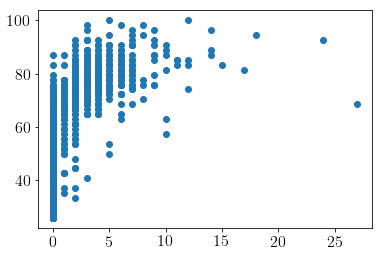

In [644]:
relevant_feature_vv = liste_vv
plt.scatter(mat_vv[:,11], LS_percent_vv)
plt.savefig("E:\\feature_vv_9.png")

In [645]:
liste_vv = [9,0,3,13,11]#out 2, 6, 5, 1

### high feature hint Sequential Global

In [646]:
print(liste_sg)

[5, 11, 7, 2, 0, 6, 3]


C:\Users\computer\Anaconda2\envs\py35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


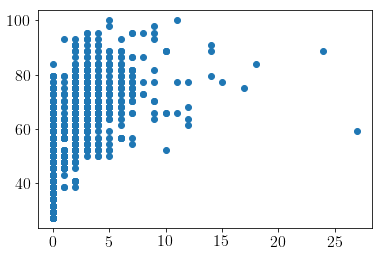

In [647]:
relevant_feature_sg = liste_sg
plt.scatter(mat_sg[:,3], LS_percent_sg)
plt.savefig("E:\\feature_sg_11.png")

In [648]:
liste_sg=[5,11,7,6,3]#out 2 & 0

## Restricted digitized indicator regarding relevant feature

In [649]:
bins = [0,1,2,3] #hint of S. Graf
print("#################################ACTIVE REFLECTIVE########################################")
rest_mat = mat_abs[:,liste]
digitized = np.digitize(rest_mat, bins)
#bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
print(digitized)
print("##################################SENSITIVE INTUITIVE#######################################")
rest_mat_si = mat_si[:,liste_si]
digitized_SI = np.digitize(rest_mat_si, bins)
#bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
print(digitized_SI)
#print(bin_means)
print("##################################VISUAL VERBAL#######################################")
rest_mat_vv = mat_vv[:,liste_vv]
digitized_VV = np.digitize(rest_mat_vv, bins)
#bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
print(digitized_VV)
print("##################################SEQUENTIAL GLOBAL#######################################")
rest_mat_sg = mat_sg[:,liste_sg]
digitized_SG = np.digitize(rest_mat_sg, bins)
#bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
print(digitized_SG)

#################################ACTIVE REFLECTIVE########################################
[[4 1 4 ... 1 3 1]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [4 1 1 ... 1 4 1]
 [4 1 1 ... 1 4 1]
 [4 1 1 ... 1 3 1]]
##################################SENSITIVE INTUITIVE#######################################
[[1 1]
 [4 4]
 [4 4]
 ...
 [1 1]
 [1 1]
 [1 1]]
##################################VISUAL VERBAL#######################################
[[1 1 1 1 1]
 [4 4 3 3 4]
 [4 4 4 4 4]
 ...
 [1 2 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
##################################SEQUENTIAL GLOBAL#######################################
[[4 1 1 1 1]
 [4 3 1 4 4]
 [4 4 4 4 4]
 ...
 [4 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [650]:
pmod_data =mat_abs[:,liste]
print(np.shape(pmod_data))
pmod_data_si = mat_si[:,liste_si]
print(np.shape(pmod_data_si))
pmod_data_vv = mat_vv[:,liste_vv]
print(np.shape(pmod_data_vv))
pmod_data_sg = mat_sg[:,liste_sg]
print(np.shape(pmod_data_sg))

(2168, 11)
(2168, 2)
(2168, 5)
(2168, 5)


# Impute missing data

In [651]:
from sklearn.preprocessing import Imputer

In [652]:
#rest_mat[:,:4] = rest_mat[:,:4]-rest_mat[:,:4].mean(axis=0)
#imax = np.concatenate((rest_mat.max(axis=0)*np.ones((1,11)),rest_mat.min(axis=0)*np.ones((1,11))),axis=0).max(axis=0)

print (pmod_data[0:5,:])
print("------------------------------------")
#for j in range (pmod_data.shape[1]):
#    ind = np.where(pmod_data[:,j]==0)
#    pmod_data[ind,j] = np.min(pmod_data[:,j])
imputer = Imputer(missing_values=0, strategy='median', axis=0)
print("#################################ACTIVE REFLECTIVE########################################")
pmod_data =imputer.fit_transform(pmod_data)
#rest_mat[:,:4] = rest_mat[:,:4]/imax[:4]
#print (rest_mat[0:5,:])
print (pmod_data[0:5,:])
mod_data = pd.DataFrame(pmod_data, columns=l_behav)
mod_data['target'] = y_ls_AR

print (pmod_data_si[0:5,:])
print("------------------------------------")
print("##################################SENSITIVE INTUITIVE#######################################")
pmod_data_si =imputer.fit_transform(pmod_data_si)
print (pmod_data_si[0:5,:])
mod_data_si = pd.DataFrame(pmod_data_si, columns=l_behav_si)
mod_data_si['target'] = y_ls_SI

print (pmod_data_vv[0:5,:])
print("------------------------------------")
print("##################################VISUAL VERBAL#######################################")
pmod_data_vv =imputer.fit_transform(pmod_data_vv)
print (pmod_data_vv[0:5,:])
mod_data_vv = pd.DataFrame(pmod_data_vv, columns=l_behav_vv)
mod_data_vv['target'] = y_ls_VV

print (pmod_data_vv[0:5,:])
print("------------------------------------")
print("##################################SEQUENTIAL GLOBAL#######################################")
pmod_data_sg =imputer.fit_transform(pmod_data_sg)
print (pmod_data_sg[0:5,:])
mod_data_sg = pd.DataFrame(pmod_data_sg, columns=l_behav_sg)
mod_data_sg['target'] = y_ls_SG

[[  9   0   4   4   0   0   0   0   0   2   0]
 [103   6  64  52  21  16  26  14   5   3   6]
 [ 58 124  40  68 120  12 120  78  20  28  42]
 [ 23   0  14   9   2   0   2   0   0   2   0]
 [  6   0   9   3   0   0   0   0   0   2   0]]
------------------------------------
#################################ACTIVE REFLECTIVE########################################
[[  9.   2.   4.   4.   3.   5.   4.   8.   5.   2.   3.]
 [103.   6.  64.  52.  21.  16.  26.  14.   5.   3.   6.]
 [ 58. 124.  40.  68. 120.  12. 120.  78.  20.  28.  42.]
 [ 23.   2.  14.   9.   2.   5.   2.   8.   5.   2.   3.]
 [  6.   2.   9.   3.   3.   5.   4.   8.   5.   2.   3.]]
[[  0   0]
 [172   5]
 [606  20]
 [  0   0]
 [  0   0]]
------------------------------------
##################################SENSITIVE INTUITIVE#######################################
[[ 37.   5.]
 [172.   5.]
 [606.  20.]
 [ 37.   5.]
 [ 37.   5.]]


ValueError: Shape of passed values is (2, 2168), indices imply (4, 2168)

In [653]:
print("#################################ACTIVE REFLECTIVE########################################")
mod_data.to_excel("E:\\ls_ar2.xls")
mod_data[0:10]


#################################ACTIVE REFLECTIVE########################################


,\core\event\course_viewed,\mod_folder\event\course_module_viewed,\mod_forum\event\discussion_viewed,\mod_forum\event\course_module_viewed,\mod_forum\event\discussion_subscription_created,\mod_workshop\event\submission_viewed,\mod_forum\event\assessable_uploaded,\mod_workshop\event\course_module_viewed,\mod_data\event\course_module_viewed,\mod_choicegroup\event\course_module_viewed,\mod_chat\event\sessions_viewed,target
0,9.0,2.0,4.0,4.0,3.0,5.0,4.0,8.0,5.0,2.0,3.0,0
1,103.0,6.0,64.0,52.0,21.0,16.0,26.0,14.0,5.0,3.0,6.0,1
2,58.0,124.0,40.0,68.0,120.0,12.0,120.0,78.0,20.0,28.0,42.0,1
3,23.0,2.0,14.0,9.0,2.0,5.0,2.0,8.0,5.0,2.0,3.0,0
4,6.0,2.0,9.0,3.0,3.0,5.0,4.0,8.0,5.0,2.0,3.0,0
5,25.0,2.0,4.0,6.0,3.0,5.0,4.0,8.0,5.0,2.0,3.0,0
6,14.0,2.0,20.0,19.0,1.0,5.0,1.0,8.0,5.0,2.0,3.0,0
7,27.0,2.0,3.0,5.0,1.0,5.0,1.0,8.0,5.0,2.0,3.0,0
8,42.0,2.0,7.0,11.0,1.0,4.0,3.0,4.0,5.0,2.0,3.0,1
9,9.0,2.0,10.0,1.0,3.0,5.0,4.0,8.0,5.0,2.0,3.0,0


In [654]:
print("##################################SENSITIVE INTUITIVE#######################################")
mod_data_si.to_excel("E:\\ls_si.xls")
mod_data_si[0:10]

##################################SENSITIVE INTUITIVE#######################################


,\core\event\course_viewed,\mod_book\event\chapter_viewed,\mod_choicegroup\event\course_module_viewed,\mod_data\event\course_module_viewed,target
0,9.0,37.0,2.0,5.0,0
1,153.0,172.0,3.0,5.0,1
2,6342.0,606.0,28.0,20.0,1
3,23.0,37.0,2.0,5.0,0
4,6.0,37.0,2.0,5.0,0
5,25.0,37.0,2.0,5.0,0
6,14.0,1.0,2.0,5.0,0
7,27.0,13.0,2.0,5.0,0
8,42.0,10.0,2.0,5.0,0
9,9.0,37.0,2.0,5.0,0


In [655]:
print("##################################VISUAL VERBAL#######################################")
mod_data_vv.to_excel("E:\\ls_vv.xls")
mod_data_vv[0:10]

##################################VISUAL VERBAL#######################################


,\mod_forum\event\course_module_viewed,\mod_forum\event\discussion_viewed,\mod_glossary\event\course_module_viewed,\mod_forum\event\discussion_subscription_created,\mod_bigbluebuttonbn\event\bigbluebuttonbn_activity_viewed,\mod_forum\event\course_searched,\mod_forum\event\assessable_uploaded,\mod_recordingsbn\event\recordingsbn_resource_page_viewed,\mod_lesson\event\content_page_viewed,target
0,4.0,4.0,6.0,3.0,2.0,2.0,4.0,1.0,3.0,0
1,52.0,64.0,7.0,21.0,11.0,2.0,26.0,2.0,4.0,1
2,5820.0,8664.0,28.0,632.0,130.0,34.0,1416.0,66.0,24.0,1
3,9.0,14.0,6.0,2.0,1.0,2.0,2.0,1.0,3.0,0
4,3.0,9.0,6.0,3.0,2.0,2.0,4.0,1.0,3.0,0
5,6.0,4.0,6.0,3.0,2.0,2.0,4.0,1.0,3.0,0
6,19.0,20.0,6.0,1.0,2.0,2.0,1.0,1.0,3.0,0
7,5.0,3.0,6.0,1.0,2.0,2.0,1.0,1.0,3.0,0
8,11.0,7.0,6.0,1.0,1.0,2.0,3.0,1.0,3.0,1
9,1.0,10.0,6.0,3.0,2.0,2.0,4.0,1.0,3.0,0


In [656]:
print("##################################SEQUENTIAL GLOBAL#######################################")
mod_data_sg.to_excel("E:\\ls_sg.xls")
mod_data_sg[0:10]

##################################SEQUENTIAL GLOBAL#######################################


,\mod_page\event\course_module_viewed,\mod_wiki\event\page_viewed,\mod_wiki\event\page_history_viewed,\mod_choice\event\course_module_viewed,\mod_choice\event\answer_submitted,\mod_wiki\event\course_module_viewed,\mod_lesson\event\content_page_viewed,target
0,7.0,3.0,1.0,3.0,1.0,2.0,3.0,0
1,34.0,2.0,1.0,4.0,1.0,3.0,4.0,1
2,438.0,110.0,38.0,92.0,1.0,72.0,24.0,1
3,10.0,3.0,1.0,3.0,1.0,2.0,3.0,0
4,2.0,3.0,1.0,1.0,1.0,2.0,3.0,0
5,4.0,3.0,1.0,3.0,1.0,2.0,3.0,0
6,6.0,3.0,1.0,3.0,1.0,2.0,3.0,0
7,7.0,3.0,1.0,3.0,1.0,2.0,3.0,0
8,22.0,3.0,1.0,3.0,1.0,2.0,3.0,0
9,2.0,3.0,1.0,3.0,1.0,2.0,3.0,0


In [657]:
#pd.plotting.scatter_matrix(mod_data, c=y_ls_AR, figsize=(5, 5), marker='o', hist_kwds={'bins': 20}, s=60,alpha=.8)
#pd.plotting.scatter_matrix(pmod_data, c=y_ls_AR)

# Apply selective search to find good features descriptorsfor the model

In [658]:
from sklearn.linear_model import Lasso, lasso_path, enet_path

In [659]:
print("#################################ACTIVE REFLECTIVE########################################")
maxd = np.max(pmod_data)
mind =  np.min(pmod_data)
norm_mat = pmod_data/(maxd)
print (maxd)
print (mind)
print (norm_mat,"\n\n---------------------------------\n")
normalize_missed_data = imputer.fit_transform(norm_mat)
print (normalize_missed_data)
print (np.shape(normalize_missed_data))
print("#################################SENSITIVE INTUITIVE########################################")
maxdi = np.max(pmod_data_si)
mindi =  np.min(pmod_data_si)
norm_mat_si = pmod_data_si/(maxdi)
print (maxdi)
print (mindi)
print (norm_mat_si,"\n\n---------------------------------\n")
normalize_missed_data_si = imputer.fit_transform(norm_mat_si)
print (normalize_missed_data_si)
print (np.shape(normalize_missed_data_si))
print("#################################VISUAL VERBAL########################################")
maxdi = np.max(pmod_data_vv)
mindi =  np.min(pmod_data_vv)
norm_mat_vv = pmod_data_vv/(maxdi)
print (maxdi)
print (mindi)
print (norm_mat_vv,"\n\n---------------------------------\n")
normalize_missed_data_vv = imputer.fit_transform(norm_mat_vv)
print (normalize_missed_data_vv)
print (np.shape(normalize_missed_data_vv))
print("#################################SEQUENTIAL GLOBAL########################################")
maxdi = np.max(pmod_data_sg)
mindi =  np.min(pmod_data_sg)
norm_mat_sg = pmod_data_sg/(maxdi)
print (maxdi)
print (mindi)
print (norm_mat_sg,"\n\n---------------------------------\n")
normalize_missed_data_sg = imputer.fit_transform(norm_mat_sg)
print (normalize_missed_data_sg)
print (np.shape(normalize_missed_data_sg))

#################################ACTIVE REFLECTIVE########################################
128.0
1.0
[[0.0703125 0.015625  0.03125   ... 0.0390625 0.015625  0.0234375]
 [0.8046875 0.046875  0.5       ... 0.0390625 0.0234375 0.046875 ]
 [0.453125  0.96875   0.3125    ... 0.15625   0.21875   0.328125 ]
 ...
 [0.09375   0.015625  0.078125  ... 0.0390625 0.0234375 0.0234375]
 [0.0234375 0.015625  0.078125  ... 0.0390625 0.0234375 0.0234375]
 [0.0234375 0.015625  0.078125  ... 0.0390625 0.015625  0.0234375]] 

---------------------------------

[[0.0703125 0.015625  0.03125   ... 0.0390625 0.015625  0.0234375]
 [0.8046875 0.046875  0.5       ... 0.0390625 0.0234375 0.046875 ]
 [0.453125  0.96875   0.3125    ... 0.15625   0.21875   0.328125 ]
 ...
 [0.09375   0.015625  0.078125  ... 0.0390625 0.0234375 0.0234375]
 [0.0234375 0.015625  0.078125  ... 0.0390625 0.0234375 0.0234375]
 [0.0234375 0.015625  0.078125  ... 0.0390625 0.015625  0.0234375]]
(2168, 11)
#################################SE

In [660]:
# Save norm_mat to train the model with other algorithms
print("#################################ACTIVE REFLECTIVE########################################")
np.save('E:\\normalize_ar.npy', normalize_missed_data)
np.save('E:\\label_ar.npy',y_ls_AR)
print("#################################SENSITIVE INTUITIVE########################################")
np.save('E:\\dataResearch\\ANN\\Sensitive_Intuitive\\normalize\\normalize_si.npy', normalize_missed_data_si)
np.save('E:\\dataResearch\\ANN\\Sensitive_Intuitive\\label_si.npy',y_ls_SI)
print("#################################VISUAL VERBAL########################################")
np.save('E:\\dataResearch\\ANN\\Visual_Verbal\\normalize\\normalize_vv.npy', normalize_missed_data_vv)
np.save('E:\\dataResearch\\ANN\\Visual_Verbal\\label_vv.npy',y_ls_VV)
print("#################################SEQUENTIAL GLOBAL########################################")
np.save('E:\\dataResearch\\ANN\\Sequential_Global\\normalize\\normalize_sg.npy', normalize_missed_data_sg)
np.save('E:\\dataResearch\\ANN\\Sequential_Global\\label_sg.npy',y_ls_SG)

#################################ACTIVE REFLECTIVE########################################
#################################SENSITIVE INTUITIVE########################################
#################################VISUAL VERBAL########################################
#################################SEQUENTIAL GLOBAL########################################


# Training the model

### Visualize the data

In [661]:
def feat_select():
    eps = 5e-3  # the smaller it is the longer is the path
    alphas_lasso, coefs_lasso, _ = lasso_path(digitized, y_ls_AR, eps, fit_intercept=False)
    alphas_enet, coefs_enet, _ = enet_path(digitized, y_ls_AR, eps=eps, l1_ratio=0.3, fit_intercept=False)

    lasso = Lasso().fit(digitized, y_ls_AR)
    print("Training set score: {:.2f}".format(lasso.score(digitized, y_ls_AR)))
    #print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
    print(lasso.coef_ )
    print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

In [662]:
#print(alphas_lasso, coefs_lasso)

In [663]:
def print_curves():
    print(coefs_lasso)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    figsize = plt.figaspect(1/2.5)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=figsize) 
    #colors = cycle(['goldenrod', 'goldenrod', 'goldenrod', 'skyblue', 'skyblue', 'skyblue']) 
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for coef_l, c in zip(coefs_lasso,colors):
        l1 = ax1.plot(alphas_lasso, coef_l, c=c)

    ax1.set_xlabel(r"$\displaystyle\lambda_1$", fontsize=16)
    ax1.set_ylabel('coefficients')
    ax1.set_title('Lasso Paths')
    ax1.axis('tight')

    for coef_e, c in zip(coefs_enet, colors):
        l2 = ax2.plot(alphas_enet, coef_e, c=c)

    ax2.set_xlabel(r"$\displaystyle\lambda_1$", fontsize=16)
    ax2.set_ylabel('coefficients')
    ax2.set_title('Elastic-Net Paths')
    ax2.axis('tight')

    plt.show()

In [664]:
#ind = np.where(np.vstack(coefs_lasso) !=0)
#nils = coefs_lasso[ind]
mrte = np.vstack(coefs_lasso)
#print(mrte[0])
#print(mrte[1])
#print(mrte[2])
#print(mrte[3])
#print(mrte[4])

## Transhorm hint matrix in binary feature

In [665]:
#gl[(gl.username==student_list_2016[555]) & (gl.eventname==LS_AR[0])]
from sklearn.preprocessing import OneHotEncoder

In [668]:
print("#################################ACTIVE REFLECTIVE########################################")
onehotencoder = OneHotEncoder(categorical_features = range(0,len(l_behav)))
xdigitize = onehotencoder.fit_transform(digitized).toarray()
print (digitized[0])
print (len(digitized[0]))
print (xdigitize[0:4])
print (len(xdigitize[0]))
#gl[(gl.courseid==10464)]
np.save("E:\\dataResearch\\ANN\\Active_Reflective\\binary\\binarize_ar.npy",xdigitize.astype(np.int8))
#print("#################################SENSITIVE INTUITIVE########################################")
#onehotencoder = OneHotEncoder(categorical_features = range(0,len(l_behav_si)))
#xdigitize_si = onehotencoder.fit_transform(digitized_SI).toarray()
#print (digitized_SI[0])
#print (len(digitized_SI[0]))
#print (xdigitize_si[0:4])
#print (len(xdigitize_si[0]))
#np.save("E:\\dataResearch\\ANN\\Sensitive_Intuitive\\binary\\binarize_si.npy",xdigitize_si.astype(np.int8))
print("#################################VISUAL VERBAL########################################")
onehotencoder = OneHotEncoder(categorical_features = range(0,len(liste_vv)))
xdigitize_vv = onehotencoder.fit_transform(digitized_VV).toarray()
print (digitized_VV[0])
print (len(digitized_VV[0]))
print (xdigitize_vv[0:4])
print (len(xdigitize_vv[0]))
np.save("E:\\dataResearch\\ANN\\Visual_Verbal\\binary\\binarize_vv.npy",xdigitize_vv.astype(np.int8))
print("#################################SEQUENTIAL GLOBAL########################################")
onehotencoder = OneHotEncoder(categorical_features = range(0,len(liste_sg)))
xdigitize_sg = onehotencoder.fit_transform(digitized_SG).toarray()
print (digitized_SG[0])
print (len(digitized_SG[0]))
print (xdigitize_sg[0:4])
print (len(xdigitize_sg[0]))
np.save("E:\\dataResearch\\ANN\\Sequential_Global\\binary\\binarize_sg.npy",xdigitize_sg.astype(np.int8))

#################################ACTIVE REFLECTIVE########################################
[4 1 4 4 1 1 1 1 1 3 1]
11
[[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]]
42
#################################VISUAL VERBAL########################################
[1 1 1 1 1]
5
[[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
print(xdigitize.shape)

# Step 3 learn the distribution of the data using Deep Belief Network

In [ ]:
##### gl[(gl.courseid==10464) & (gl.username=="user2516430680280268801")].eventname.unique().tolist()

In [75]:
#gl[(gl.courseid==10464) & (gl.component=="mod_workshop") & (gl.username=="user2516430680280268801")].target.unique().tolist()

['course_module', 'submission', 'assessable']

In [76]:
#gl[(gl.courseid==10464) & (gl.objecttable=="question") & (gl.username=="user2516430680280268801")]

,username,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip,relatedusername,realusername


In [53]:
#gl[(gl.courseid==10464) & (gl.target=="course_module") & (gl.username=="user2516430680280268801")].contextinstanceid.unique().tolist()

In [54]:
#gl[(gl.courseid==10464) & (gl.target=="course_module") & (gl.username=="user2516430680280268801")]

In [55]:
import numpy as np
#len(gl['eventname']=="\\mod_scorm\\event\\course_module_viewed")
#gl[(gl.eventname=="\\mod_scorm\\event\\course_module_viewed") & (gl.username=="user2959087468848087041")]

#gl[(gl.eventname=="\\mod_wiki\\event\\page_viewed") & (gl.username=="user2959087468848087041")]

,username,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip,relatedusername,realusername


## Plot histogram of events

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [15]:
#df = gl['eventname']

In [28]:
#df.hist()

In [26]:
#gl[gl["username"]=="user8540069828419911681"]

,username,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip,relatedusername,realusername
0,user8540069828419911681,25017,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1417771086,web,0.0.0.0,NaN,NaN
1,user8540069828419911681,25017,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1417771086,web,0.0.0.0,NaN,NaN
4,user8540069828419911681,70090,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1418071759,web,0.0.0.0,NaN,NaN
5,user8540069828419911681,70090,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1418071759,web,0.0.0.0,NaN,NaN
40,user8540069828419911681,612588,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1421164465,web,0.0.0.0,NaN,NaN
41,user8540069828419911681,612588,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1421164465,web,0.0.0.0,NaN,NaN
66,user8540069828419911681,945967,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1421398751,web,0.0.0.0,NaN,NaN
67,user8540069828419911681,945967,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1421398751,web,0.0.0.0,NaN,NaN
68,user8540069828419911681,953849,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1421401366,web,0.0.0.0,NaN,NaN
69,user8540069828419911681,953849,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,...,50,5282,5282,0,N;,1421401366,web,0.0.0.0,NaN,NaN
